# **Revani_0110224111_TugasMandiri7_EDA**

# Pertemuan 1

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# Tampilkan beberapa baris pertama DataFrame untuk memastikan data berhasil dimuat
display(df.head())

Saving Salary_Data_Tugas EDA.xlsx to Salary_Data_Tugas EDA (1).xlsx


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [4]:
# Tampilkan lima baris pertama dari DataFrame df
print("Lima baris pertama dari DataFrame:")
display(df.head())

Lima baris pertama dari DataFrame:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [5]:
# Cetak informasi ringkasan tentang DataFrame df
print("\nInformasi tentang DataFrame:")
df.info()


Informasi tentang DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 1 to 6707
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6707 non-null   int64  
 1   Gender               6707 non-null   object 
 2   Education Level      6706 non-null   object 
 3   Job Title            6706 non-null   object 
 4   Years of Experience  6705 non-null   float64
 5   Salary               6703 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.5+ KB


In [6]:
# Hitung dan tampilkan jumlah nilai yang hilang di setiap kolom
print("\nJumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())


Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


# Pertemuan 2

In [7]:
# mengecek ukuran dataset (jumlah baris dan kolom)
print("Ukuran Dataset (baris, kolom):", df.shape)

# mengecek jumlah total elemen dalam dataset
print("Jumlah Total Elemen:", df.size)

Ukuran Dataset (baris, kolom): (6707, 6)
Jumlah Total Elemen: 40242


In [8]:
# mengecek tipe data dari sebuah variabel
my_variable = "Hello"
print("Tipe data my_variable:", type(my_variable))

my_number = 123
print("Tipe data my_number:", type(my_number))

# mengecek tipe data dari setiap kolom dalam dataframe
print("\nTipe data setiap kolom dalam DataFrame:")
print(df.dtypes)

Tipe data my_variable: <class 'str'>
Tipe data my_number: <class 'int'>

Tipe data setiap kolom dalam DataFrame:
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [9]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [10]:
# hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

#jika ada baris duplikat, tampilkan eberapa baris duplikat pertama
if duplicate_rows_count > 0:
    print("\nBeberapa baris duplikat pertama:")
    display(df[df.duplicated(keep=False)].head())

Jumlah baris duplikat: 4913

Beberapa baris duplikat pertama:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
141,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
195,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
209,30,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0


# Pertemuan 3

In [11]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung statistik deskriptif: median, modus, simpangan rata-rata, range, dan variansi
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

# Tambahkan hasil perhitungan ke tabel statistik deskriptif
descriptive_stats.loc['median'] = median_values
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['mad'] = mad_values
descriptive_stats.loc['range'] = range_values
descriptive_stats.loc['variance'] = variance_values

print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,Age,Years of Experience,Salary
count,6707.000000,6705.000000,6.703000e+03
mean,33.623677,8.096346,1.154461e+05
std,7.621529,6.067248,5.388179e+04
min,21.000000,0.000000,3.500000e+02
25%,28.000000,3.000000,7.000000e+04
50%,32.000000,7.000000,1.150000e+05
75%,38.000000,12.000000,1.600000e+05
max,62.000000,35.000000,1.000000e+06
median,32.000000,7.000000,1.150000e+05
mode,27.000000,2.000000,1.400000e+05


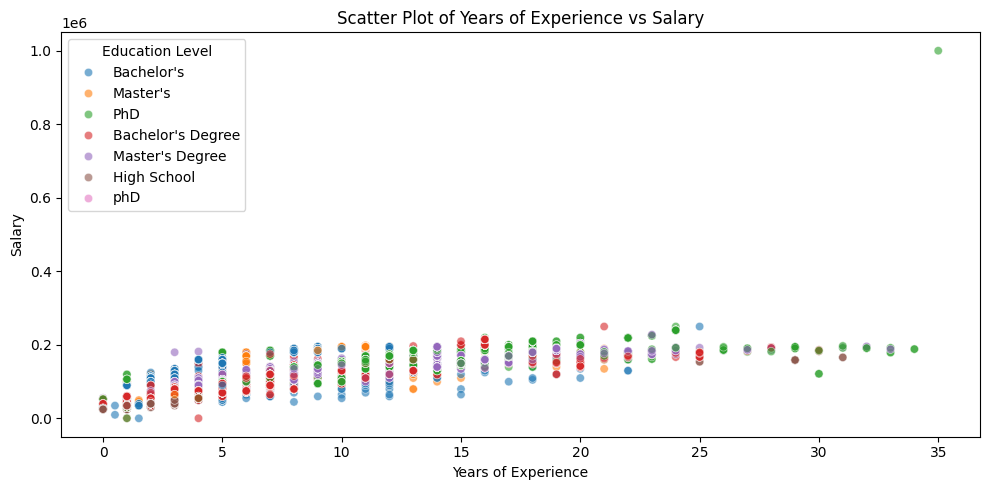

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_scatter = ['Years of Experience', 'Salary']

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,
                x=numerical_cols_scatter[0],
                y=numerical_cols_scatter[1],
                hue='Education Level',
                alpha=0.6)

plt.title(f'Scatter Plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

In [13]:
salary_mode = df['Salary'].mode()[0]
educationlevel_mode = df['Education Level'].mode()[0]
jobtitle_mode = df['Job Title'].mode()[0]
yearsofexperience_mode = df['Years of Experience'].mode()[0]

print(f"Modus dari kolom 'Salary': {salary_mode}")
print(f"Modus dari kolom 'Education Level': {educationlevel_mode}")
print(f"Modus dari kolom 'Job Title': {jobtitle_mode}")
print(f"Modus dari kolom 'Years of Experience': {yearsofexperience_mode}")

Modus dari kolom 'Salary': 140000.0
Modus dari kolom 'Education Level': Bachelor's Degree
Modus dari kolom 'Job Title': Software Engineer
Modus dari kolom 'Years of Experience': 2.0


In [14]:
missing_values_before_drop = df['Salary'].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Salary' sebelum pengisian: {missing_values_before_drop}")

df_dropped = df.dropna(subset=['Salary']).copy()

missing_values_after_drop = df_dropped['Salary'].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: {missing_values_after_drop}")


Jumlah nilai yang hilang di kolom 'Salary' sebelum pengisian: 4

Jumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: 0


In [15]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

#Jika ada baris duplikat, hapus baris duplikat
if duplicate_rows_count > 0:
  print("\nMenghapus baris duplikat...")
  df = df.drop_duplicates()
  print("Baris duplikat telah dihapus.")

# Verifikasi bahwa tidak ada lagi baris duplikat
duplicate_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan duplikat
if duplicate_rows_count > 0:
  print("\nBeberapa baris pertama DataFrame setelah penghapusan duplikat:")
  display(df.head())

Jumlah baris duplikat: 4913

Menghapus baris duplikat...
Baris duplikat telah dihapus.

Jumlah baris duplikat setelah penghapusan: 0

Beberapa baris pertama DataFrame setelah penghapusan duplikat:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


# Pertemuan 4

In [16]:
categorical_cols = df.select_dtypes(include='object').columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())

Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Gender
Gender
Male      971
Female    816
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    508
Master's Degree      447
PhD                  342
Bachelor's           263
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Developer                      1
Social M                       1
Social Media Man               1
Delivery Driver                1
Intern                         1
Name: count, Length: 194, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,Age,Years of Experience,Salary
count,1794.000000,1792.000000,1790.000000
mean,35.140468,9.162109,113668.149162
std,8.232829,6.866281,55695.750262
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,35.000000,1000000.000000



Distribusi kolom 'Education Level' setelah standardisasi:
Education Level
bachelor's degree    508
master's degree      447
phd                  343
bachelor's           263
master's             122
high school          110
Name: count, dtype: int64


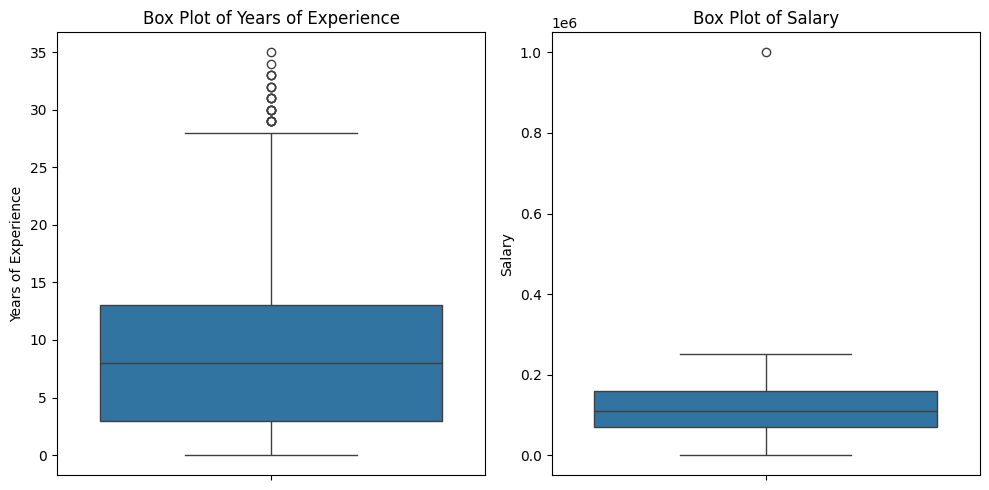

In [17]:
df.loc[:, 'Education Level'] = df['Education Level'].str.lower().str.strip()

print("\nDistribusi kolom 'Education Level' setelah standardisasi:")
print(df['Education Level'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi kolom numerik untuk mendeteksi outlier (Box Plot)
numerical_cols_outliers = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [18]:
upper_limit = 20000000
rows_before_drop = len(df)
print(f"Jumlah baris sebelum drop: {rows_before_drop}")
df_no_outliers = df[df['Salary'] <= upper_limit]
rows_after_drop = len(df_no_outliers)
print(f"Jumlah baris setelah drop: {rows_after_drop}")
print(f"Jumlah baris yang dihapus: {rows_before_drop - rows_after_drop}")

print("\nStatistik deskriptif untuk 'Salary' setelah drop outlier:")
display(df_no_outliers['Salary'].describe())
print("\nBeberapa baris pertama DataFrame setelah drop outlier:")
display(df_no_outliers.head())

Jumlah baris sebelum drop: 1794
Jumlah baris setelah drop: 1790
Jumlah baris yang dihapus: 4

Statistik deskriptif untuk 'Salary' setelah drop outlier:


,Salary
count,1790.000000
mean,113668.149162
std,55695.750262
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,1000000.000000



Beberapa baris pertama DataFrame setelah drop outlier:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,bachelor's,Software Engineer,5.0,90000.0
2,28,Female,master's,Data Analyst,3.0,65000.0
3,45,Male,phd,Senior Manager,NaN,150000.0
4,36,Female,bachelor's,Sales Associate,7.0,60000.0
5,52,Male,master's,Director,20.0,200000.0



Statistik deskriptif untuk 'Salary' setelah capping (upper limit = 192077.8):


,Salary
count,1790.000000
mean,112716.436872
std,50732.733160
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,192077.800000


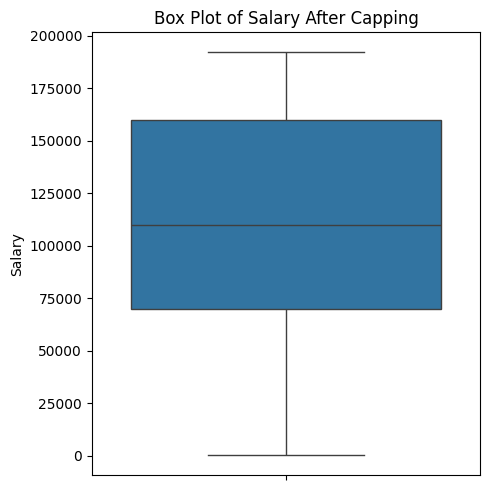

In [19]:
upper_limit = df['Salary'].quantile(0.95)
df.loc[:, 'Salary'] = df['Salary'].clip(upper=upper_limit)

print(f"\nStatistik deskriptif untuk 'Salary' setelah capping (upper limit = {upper_limit}):")
display(df['Salary'].describe())

# Visualisasi 'Salary' setelah capping (Box Plot)
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='Salary')
plt.title('Box Plot of Salary After Capping')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [20]:
# Hitung jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan
missing_values_before_drop = df['Salary'].isnull().sum()
print(f"Jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan: {missing_values_before_drop}")

# Hapus baris dengan nilai yang hilang di kolom 'Salary'
df_dropped = df.dropna (subset=['Salary']).copy ()

# Verifikasi bahwa tidak ada lagi nilai yang hilang di kolom 'Salary
missing_values_after_drop = df_dropped['Salary'].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: {missing_values_after_drop}")

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan
print("\nBeberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:")
display(df_dropped.head())
print(f"\nUkuran DataFrame setelah penghapusan nilai yang hilang: {df_dropped.shape}")

Jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan: 4

Jumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: 0

Beberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,bachelor's,Software Engineer,5.0,90000.0
2,28,Female,master's,Data Analyst,3.0,65000.0
3,45,Male,phd,Senior Manager,NaN,150000.0
4,36,Female,bachelor's,Sales Associate,7.0,60000.0
5,52,Male,master's,Director,20.0,192077.8



Ukuran DataFrame setelah penghapusan nilai yang hilang: (1790, 6)


In [21]:
# Tentukan batas atas untuk outlier (sesuai dengan yang Anda gunakan sebelumnya)
upper_limit = 20000000

# Hitung jumlah baris sebelum penghapusan outlier
rows_before_drop = len(df)
print(f"Jumlah baris sebelum menghapus outlier: {rows_before_drop}")

# Hapus baris di mana 'Salary' lebih besar dari batas atas
df_no_outliers = df[df['Salary'] <= upper_limit].copy()

# Hitung jumlah baris setelah penghapusan outlier
rows_after_drop = len(df_no_outliers)
print(f"Jumlah baris setelah menghapus outlier di 'Salary': {rows_after_drop}")
print(f"Jumlah outlier yang dihapus: {rows_before_drop - rows_after_drop}")

# Tampilkan statistik deskriptif untuk 'Salary' setelah penghapusan outlier
print("\nStatistik deskriptif untuk 'Salary' setelah menghapus outlier:")
display(df_no_outliers['Salary'].describe())

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan outlier
print("\nBeberapa baris pertama DataFrame setelah menghapus outlier:")
display(df_no_outliers.head())

Jumlah baris sebelum menghapus outlier: 1794
Jumlah baris setelah menghapus outlier di 'Salary': 1790
Jumlah outlier yang dihapus: 4

Statistik deskriptif untuk 'Salary' setelah menghapus outlier:


,Salary
count,1790.000000
mean,112716.436872
std,50732.733160
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,192077.800000



Beberapa baris pertama DataFrame setelah menghapus outlier:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,bachelor's,Software Engineer,5.0,90000.0
2,28,Female,master's,Data Analyst,3.0,65000.0
3,45,Male,phd,Senior Manager,NaN,150000.0
4,36,Female,bachelor's,Sales Associate,7.0,60000.0
5,52,Male,master's,Director,20.0,192077.8


In [22]:
output_file_name = 'data_bersih_tugas.xlsx'
df.to_excel(output_file_name, index=False)
print(f"DataFrame telah berhasil disimpan ke '{output_file_name}'")

DataFrame telah berhasil disimpan ke 'data_bersih_tugas.xlsx'


# Pertemuan 5

In [23]:
# Menampilkan korelasi antara Years of Experience dan Salary
correlation = df['Years of Experience'].corr(df['Salary'])
print(f"Korelasi antara Years of Experience dan Salary: {correlation}")

Korelasi antara Years of Experience dan Salary: 0.81761789751938


In [24]:
# Menampilkan korelasi antara Years of Experience dan Salary
correlation = df['Years of Experience'].corr(df['Salary'])
print(f"Korelasi antara Years of Experience dan Salary: {correlation}")

# Hitung koefisien determinasi (R-squared)
r_squared = correlation**2
print(f"Koefisien determinasi (R-squared) antara Years of Experience dan Salary: {r_squared}")

Korelasi antara Years of Experience dan Salary: 0.81761789751938
Koefisien determinasi (R-squared) antara Years of Experience dan Salary: 0.6684990263440114


In [25]:
print(f"Jumlah data awal: {len(df)} baris")

# Menghapus baris mana pun yang memiliki nilai kosong (NaN)
df_no_nan = df.dropna()
print(f"Jumlah data setelah menghapus NaN: {len(df_no_nan)} baris")

# Hitung Q1 (Kuartil 1) dan Q3 (Kuartil 3) untuk kedua kolom
Q1 = df_no_nan[['Years of Experience', 'Salary']].quantile(0.25)
Q3 = df_no_nan[['Years of Experience', 'Salary']].quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Bbatas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data: simpan hanya data yang berada di dalam batas (bukan outlier)
df_cleaned = df_no_nan[
    (df_no_nan['Years of Experience'] >= lower_bound['Years of Experience']) &
    (df_no_nan['Years of Experience'] <= upper_bound['Years of Experience']) &
    (df_no_nan['Salary'] >= lower_bound['Salary']) &
    (df_no_nan['Salary'] <= upper_bound['Salary'])
]

print(f"Jumlah data setelah menghapus outlier: {len(df_cleaned)} baris")

# Reset indeks dan tambahkan 1 (seperti kode asli)
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.index = df_cleaned.index + 1

# Tampilkan data bersih dan hitung korelasi
print("\n--- Data Bersih (setelah hapus NaN dan Outlier) ---")
display(df_cleaned.head())

# Menampilkan korelasi pada data yang sudah bersih
correlation = df_cleaned['Years of Experience'].corr(df_cleaned['Salary'])
print(f"Korelasi (setelah cleaning) antara Years of Experience dan Pendapatan: {correlation}")

# Hitung koefisien determinasi (R-squared) pada data yang sudah bersih
r_squared = correlation**2
print(f"Koefisien determinasi (R-squared) (setelah cleaning): {r_squared}")

Jumlah data awal: 1794 baris
Jumlah data setelah menghapus NaN: 1787 baris
Jumlah data setelah menghapus outlier: 1764 baris

--- Data Bersih (setelah hapus NaN dan Outlier) ---


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,bachelor's,Software Engineer,5.0,90000.0
2,28,Female,master's,Data Analyst,3.0,65000.0
3,36,Female,bachelor's,Sales Associate,7.0,60000.0
4,52,Male,master's,Director,20.0,192077.8
5,42,Female,master's,Product Manager,12.0,120000.0


Korelasi (setelah cleaning) antara Years of Experience dan Pendapatan: 0.826820707692568
Koefisien determinasi (R-squared) (setelah cleaning): 0.6836324826692389


In [27]:
import statsmodels.api as sm

X_exp = df_cleaned['Years of Experience']
y_salary = df_cleaned['Salary']
X_exp = sm.add_constant(X_exp)

model_YearsOfExperience_Salary = sm.OLS(y_salary, X_exp).fit()
print(model_YearsOfExperience_Salary.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     3807.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:19:54   Log-Likelihood:                -20588.
No. Observations:                1764   AIC:                         4.118e+04
Df Residuals:                    1762   BIC:                         4.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.433e+04   1

# Pertemuan 6

In [29]:
# Mengambil koefisien dari model regresi Salary vs YearsOfExperience
intercept_YearsOfExperience_Salary = model_YearsOfExperience_Salary.params['const']
YearsOfExperience_coef_YearsOfExperience_Salary = model_YearsOfExperience_Salary.params['Years of Experience']

print(f"Persamaan Garis Regresi (Salary vs YearsOfExperience):")
print(f"Salary_prediksi = {intercept_YearsOfExperience_Salary:.4f} + ({YearsOfExperience_coef_YearsOfExperience_Salary:.4f}) * Years of Experience")

Persamaan Garis Regresi (Salary vs YearsOfExperience):
Salary_prediksi = 54326.0360 + (6468.1654) * Years of Experience


In [30]:
import statsmodels.api as sm

X = df_cleaned['Years of Experience']
y = df_cleaned['Salary']

X = sm.add_constant(X)
model_YearsOfExperience_Salary = sm.OLS(y, X).fit()

Hasil Uji Shapiro-Wilk: statistik =nan,p-value=nan
Data tidak berdistribusi normal (menolak H0)


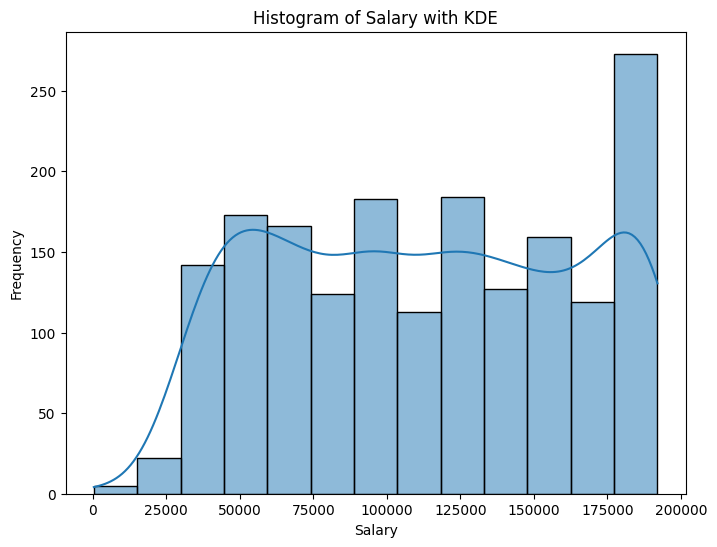

In [32]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

shapiro_test= stats.shapiro(df['Salary'])
print(f"Hasil Uji Shapiro-Wilk: statistik ={shapiro_test.statistic:.4f},p-value={shapiro_test.pvalue:.4f}")
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Data kemungkinan berdistribusi normal (gagal menolak H0)")
else:
    print("Data tidak berdistribusi normal (menolak H0)")
plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Histogram of Salary with KDE')
plt.xlabel('Salary' )
plt.ylabel('Frequency' )
plt.show()

In [33]:
import statsmodels.formula.api as smf

# Reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index += 1

# Rename the column to remove spaces
df_cleaned = df_cleaned.rename(columns={'Years of Experience': 'Years_of_Experience'})

# Definisikan dan sesuaikan model regresi Salary vs Year of Experience
model_Years_of_Experience_Salary = smf.ols('Salary ~ Years_of_Experience', data=df_cleaned).fit()

# Mengambil koefisien dari model regresi Salary vs Year of Experience
intercept_Years_of_Experience_Salary = model_Years_of_Experience_Salary.params['Intercept']
Years_of_Experience_coef_Years_of_Experience_Salary = model_Years_of_Experience_Salary.params['Years_of_Experience']

# Mengambil Jumlah Kuadrat Residual (SSR) dari model
ssr_Years_of_Experience_Salary = model_Years_of_Experience_Salary.ssr

# Cetak hasil
print(f"Jumlah Kuadrat Residual (SSR) untuk model Salary vs Year of Experience: {ssr_Years_of_Experience_Salary:.4f}")
print(f"Persamaan Garis Regresi (Salary vs Year of Experience):")
print(f"Salary_prediksi = {intercept_Years_of_Experience_Salary:.4f} + ({Years_of_Experience_coef_Years_of_Experience_Salary:.4f}) * Years of Experience")


Jumlah Kuadrat Residual (SSR) untuk model Salary vs Year of Experience: 1416850335062.6541
Persamaan Garis Regresi (Salary vs Year of Experience):
Salary_prediksi = 54326.0360 + (6468.1654) * Years of Experience
